<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/C%C3%B3digo_SNIa_com_covariancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

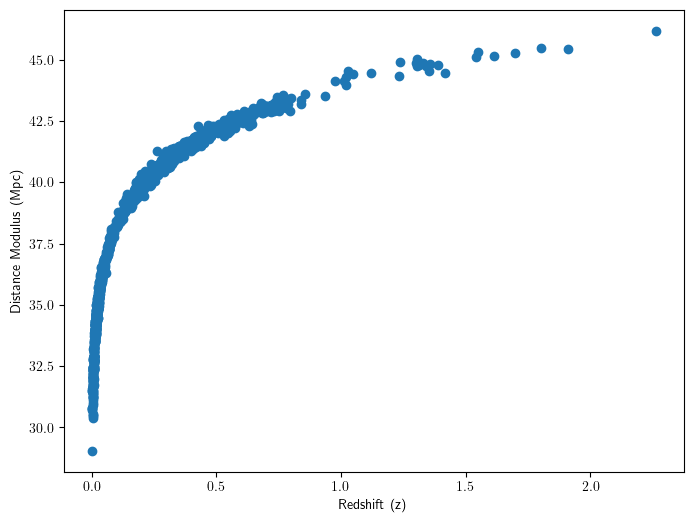

In [23]:
import urllib.request # Usar biblioteca Pandas para ler o arquivo como um DataFrame e pular a primeira linha com o cabeçalho
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# 1) BAIXANDO O ARQUIVO

url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"
filename = "Pantheon+SH0ES.dat"

urllib.request.urlretrieve(url, filename)

# 2) GERANDO O GRÁFICO COM OS DADOS DO CATÁLOGO PANTHEON+

#primeira linha do arquivo contém o cabeçalho da tabela, com nomes de colunas e outros metadados, e não dados numéricos.
df = pd.read_csv(filename, skiprows=2, delim_whitespace=True, names=['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'])
# skiprows=1, especifica que o arquivo está separado por espaços em branco com o argumento delim_whitespace=True, e nomeia as colunas do DataFrame com o argumento names.

plt.figure(figsize=(8, 6))
plt.scatter(df["zCMB"], df["MU_SH0ES"])
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (Mpc)")
plt.show()
#df.info() #verificar se há algum valor nulo ou algum outro problema com os dados...


In [12]:
print(df["zCMB"].unique()) #Visualizando coluna z
print(df["MU_SH0ES"].unique()) #Visualizando coluna DM

[1.22000e-03 2.56000e-03 2.99000e-03 ... 1.80111e+00 1.91160e+00
 2.26130e+00]
[29.0559 30.7233 30.7449 ... 45.4865 45.4233 46.1828]


In [13]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

conda-forge/linux-64                                        Usin

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

In [ ]:
!apt-get install cm-super

In [ ]:
!apt-get install dvipng

In [17]:
import pyccl as ccl
from scipy.optimize import curve_fit
from matplotlib import rc

In [18]:
#Baixando dados da covariância
url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES_STAT%2BSYS.cov"
filename = "Pantheon+SH0ES_STAT+SYS.cov"

urllib.request.urlretrieve(url, filename)

data = np.genfromtxt('Pantheon+SH0ES.dat', names=True)

(1701, 1701)


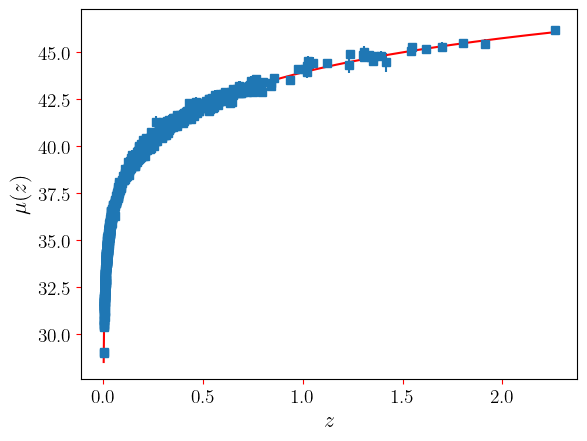

In [19]:
cov = np.genfromtxt('Pantheon+SH0ES_STAT+SYS.cov', skip_header=1)
cov = np.reshape(cov, (1701, 1701))

print(np.shape(cov))

plt.rcParams['text.usetex'] = True


z = data['zCMB']

mu = data['MU_SH0ES']

def mu_teorico(z, h, Om_c):

    cosmo = ccl.Cosmology(Omega_c=Om_c, Omega_b=0.049411603, Omega_k=0, h=h, w0=-1, wa=0, sigma8=0.8120, n_s=0.9649)

    a = 1. / (1. + z)

    return ccl.distance_modulus(cosmo, a) 

#Ajuste da função de módulo da distância

popt, pcov = curve_fit(mu_teorico, z, mu, sigma=cov, p0=[0.7, 0.3], bounds=([0., 0.], [1., 1.]), method='trf')

p1 = popt[0] * 100
p2 = popt[1] + 0.049411603

Erro = np.sqrt(np.diag(pcov))

e1 = Erro[0]
e2 = Erro[1]

# PLOTANDO O GRAFICO COM CURVA DE AJUSTE


zi = np.linspace(min(z), max(z), 1000)

plt.tick_params(labelsize=14, color='red')
plt.xlabel(r'$z$', fontsize=16)
plt.ylabel(r'$\mu(z)$', fontsize=16)
plt.errorbar(z, mu, np.sqrt(np.diag(cov)), fmt='s', label='Data points')
plt.plot(zi, mu_teorico(zi, popt[0], popt[1]), color='red', label=r'$H_0$ = '+str(np.round(p1, 3))+' $\pm$ '+str(np.round(e1, 3))+' ; '+'$\Omega$ = '+str(np.round(p2, 3))+' $\pm$ '+str(np.round(e2, 3)))
plt.show()

In [22]:
# cálculo do xi2 reduzido: quanto mais próximo de 1, maior a concordância entre as distribuições observadas e esperadas

xi2 = np.sum(((mu - mu_teorico(z, *popt)) / np.sqrt(np.diag(cov))) ** 2)
df = len(z) - 2
print(xi2/df)

1.2458191011894537
